# Analysing single patient results

Data location: 
- `foldpath` is the folder where the data is saved (in my case, Downloads folder). Windows uses \ for folder separation (rather than / in MacOS).
- `patientID` is the patient ID (no need to include the reverb condition)

In [132]:
foldpath ='/Users/emiliedolne/Downloads'
patientID='THIJO'#'THOAN2'

Install libraries and import into the Jupyter notebook.

In [133]:
%%capture
! pip install matplotlib
import pickle
import matplotlib as plt
from utils.basie_class import *
import os

## Final estimate plot
This plots the patient's psychometric curves for each reverberant condition using the **final** SRT and slope estimates.

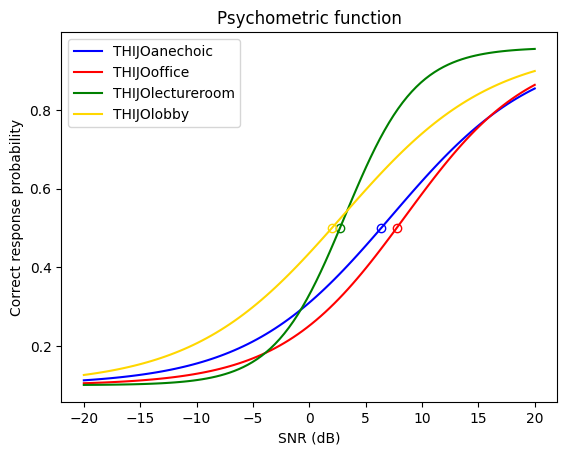

In [134]:
listpatient=[]
for fold in os.listdir(foldpath):
    if patientID in fold:
        listpatient.append(fold)

colorlist=['b','r','g','gold']
colorlistflash=['aqua', 'mistyrose', 'lime', 'yellow']
filelist=[]
estimatelist=[]
conditionlist=[]
i=0
for condition in listpatient:
    conditionlist.append(condition)
    for path, subdirs, files in os.walk(os.path.join(foldpath, condition)):
        for name in files:
            if 'pkl' in name:
                with open(os.path.join(path,name), 'rb') as f:
                    [estimate, __,__, __, __]=pickle.load(f)
                    estimatelist.append(estimate)

for i in range(len(estimatelist)):
    estimatelist[i].plot('f',0)
    plt.gca().lines[-2].set_color(colorlist[i])
    plt.gca().lines[-1].set_color(colorlist[i])

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
(ax.legend(handles, conditionlist));

## Probability plots
This plots the **joint posterior probability density function** of the SRT and slope parameters. It gives the probability that the true parameters take a certain value given the measurements we have made - brighter colors indicate a higher probability.

The x-axis gives the SRT values and the y-axis gives the slope values.

A more densely concentrated plot can be seen as more 'confident' in the final estimates.

['THIJOanechoic', 'THIJOoffice', 'THIJOlectureroom', 'THIJOlobby']


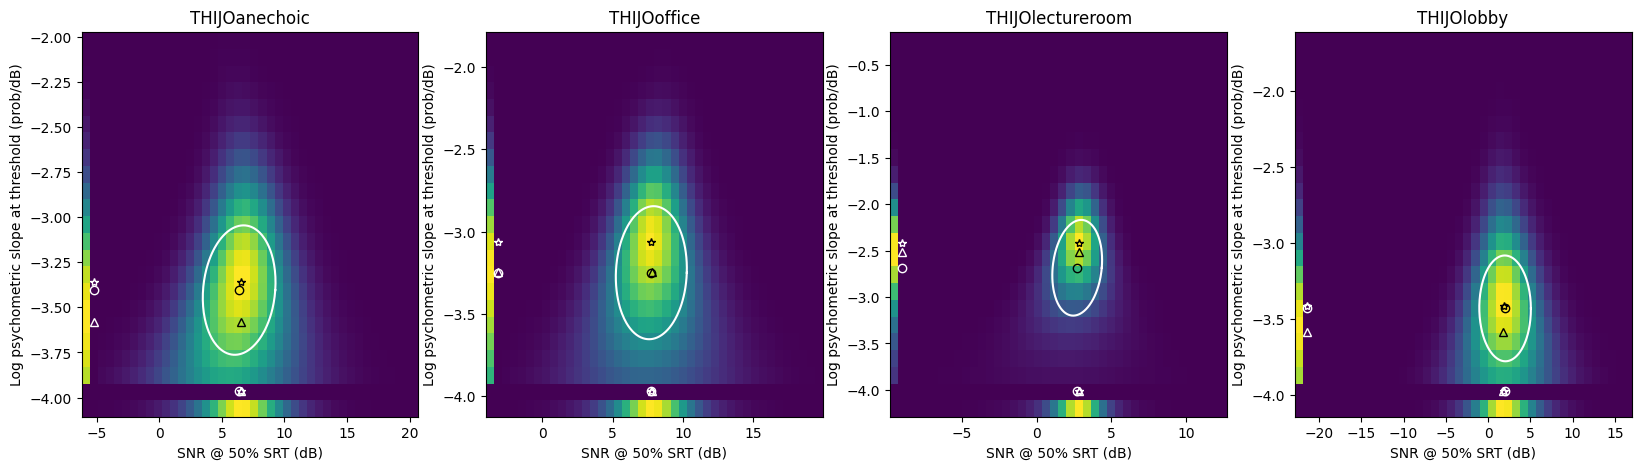

In [135]:
fig, axs=plt.subplots(nrows=1, ncols=len(conditionlist), figsize=(5*len(conditionlist),5))
print(conditionlist)
for i in range(len(conditionlist)):
    plt.sca(axs[i])
    estimatelist[i].plot('p',0)
    plt.title(conditionlist[i])
#     axs[i].set_xlim([-3,15])

## Psychometric curve history
This plots the evolution of the psychometric curve estimation over the 40 samples. Lighter lines correspond to early samples while darker lines show recent estimates. This is a simple visualisation which gives less information than the probability plot above - it might still give an idea of the variance in the estimate. 

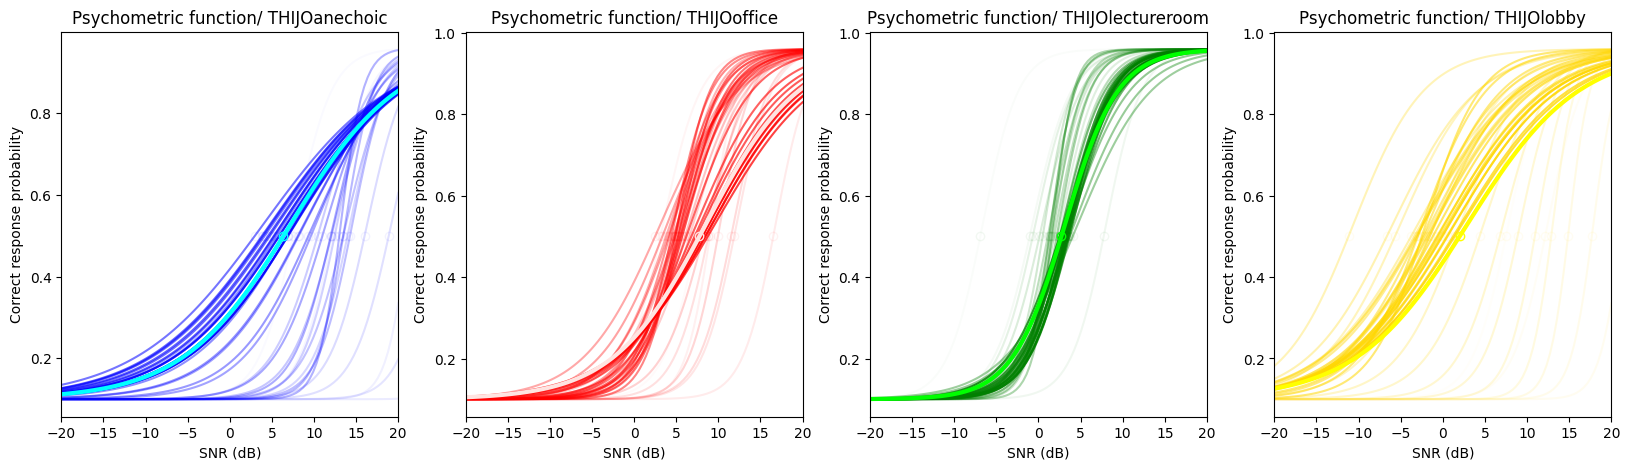

In [136]:
# estimatelist[0].summary()[2][0][2]
fig, axs=plt.subplots(nrows=1, ncols=len(conditionlist), figsize=(5*len(conditionlist),5))

for j in range(len(conditionlist)):
    plt.sca(axs[j])
    patient1estimate=basie_estimator()
    patient1estimate.initialise(1, modelp=estimatelist[j].summary()[0], availsnr=np.linspace(-20, 20, 41).T,
                               basiep=estimatelist[j].summary()[1])
    for i in range(len(estimatelist[j].summary()[2])):
        response = estimatelist[j].summary()[2][i][2];
        snr=estimatelist[j].summary()[2][i][1]

        [__, __, m, v] =patient1estimate.update(0, probesnr=snr, response=response, robust=False)
        patient1estimate.plot('f', 0)
        if i>0:
            plt.gca().lines[2*i-2].set_alpha(i/(40+10))
            plt.gca().lines[2*i-2].set_color(colorlist[j])
            plt.gca().lines[2*i-1].set_alpha(0.05)
            plt.gca().lines[2*i-1].set_color(colorlist[j])
    plt.gca().lines[-1].set_color(colorlistflash[j])
    plt.gca().lines[-2].set_color(colorlistflash[j])
    plt.gca().lines[-1].set_linewidth(3)
    plt.gca().lines[-2].set_linewidth(3)
    axs[j].set_xlim([-20, 20])
    plt.title(axs[j].get_title()+ '/ ' +conditionlist[j])

# Trial history plot
These plots jointly show the response and estimation history.
- The red **+**s and blue **o**s indicate a correct/incorrect response at a given trial number and the corresponding input SNR.
- The full blue line shows the SRT estimate as a function of trial number
- The upper/lower dotted blue lines show the estimated 25%/75% intelligibilty points obtained using the slope estimate

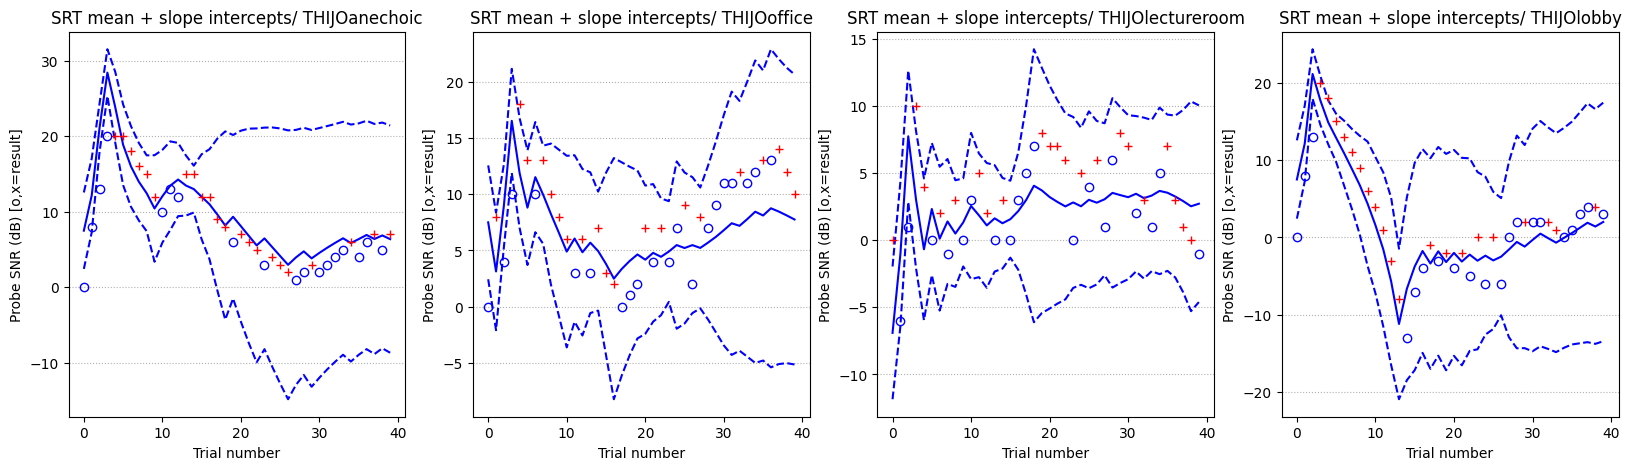

In [137]:
fig, axs=plt.subplots(nrows=1, ncols=len(conditionlist), figsize=(5*len(conditionlist),5))

for i in range(len(conditionlist)):
    plt.sca(axs[i])
    estimatelist[i].plot('h',0)
    plt.title(axs[i].get_title()+ '/ ' +conditionlist[i])

# Cost function evolution
This gives an idea of whether the algorithm has converged to a solution. The red line shows the convergence for SRT only, and the blue curve shows convergence for SRT and slope jointly.

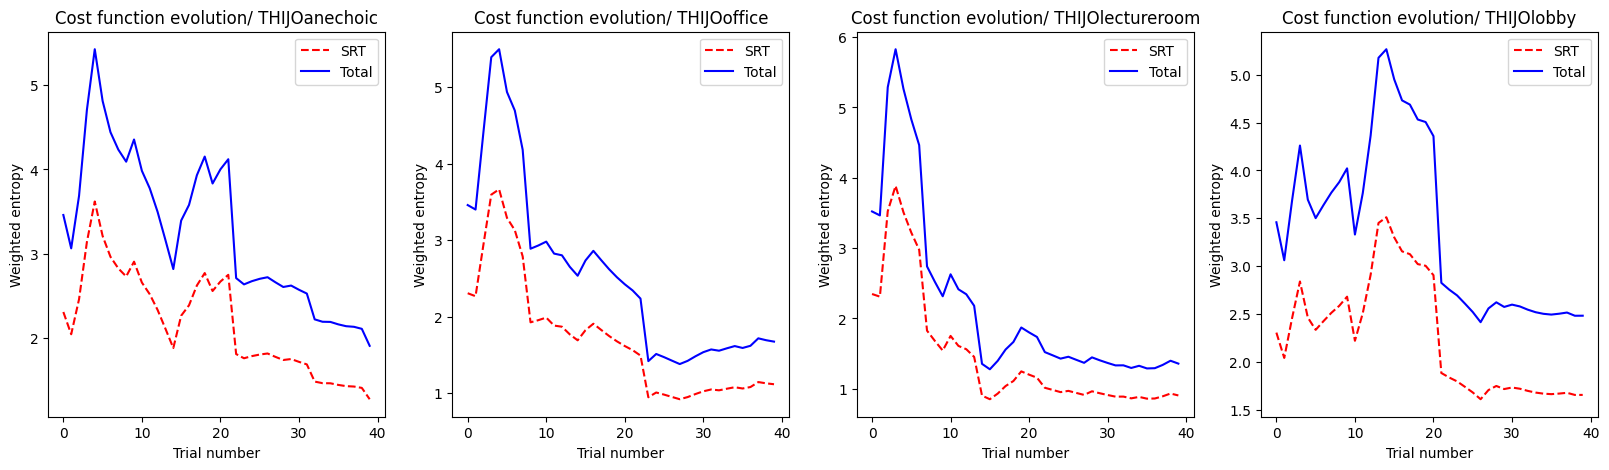

In [138]:
fig, axs=plt.subplots(nrows=1, ncols=len(conditionlist), figsize=(5*len(conditionlist),5))

for i in range(len(conditionlist)):
    plt.sca(axs[i])
    estimatelist[i].plot('c',0)
    plt.title(axs[i].get_title()+ '/ ' +conditionlist[i])